In [109]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
plt.rcParams['font.sans-serif'] = ['SimHei'] # 黑体
plt.rcParams['axes.unicode_minus'] = False

# 绽放反应  

## 伤害计算公式  
$$反应基础伤害 * 等级系数 * 反应基础倍率 * (1 + \frac{16*精通}{2000+精通} + 反应伤害提升) * 抗性 * 额外收益$$

- 等级系数：角色等级当然越高越好
- 反应基础倍率：绽放=2,超/烈绽放=3
- 反应伤害提升：如花海四件套效果
- 额外收益：如草神2命带来的暴击期望

## 精通收益与圣遗物  

### 公式与精通有关的部分  
$$\frac{16*精通}{2000+精通}$$

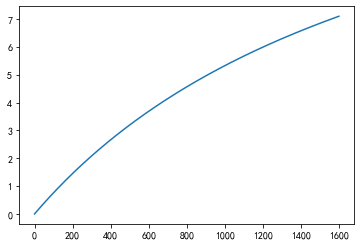

In [110]:
x = np.arange(0, 1600)
plt.plot(x, (16*x)/(2000+x))
plt.show()

因乐园套增加反应伤害,于是带上反应伤害加成

$$\frac{16*精通}{2000+精通} + 反应伤害加成$$

以发射器的圣遗物选择精精精(主词条187*3), 武器(4星武器铁峰刺)精通165为例  

- 散件2+2:  
$$精通 = 165 + 80 * 2 + 187 * 3 + 副词条精通$$

In [111]:
# 散件2+2
def eFn1(subEm1):
  return 165 + 80*2 + 187*3 + subEm1

- 饰金: 二件套+80 四件套+150(每个不同属性队友+50,按全部不同计算。注:双草共鸣可给全队加成最大100精通,有条件可以上双草)
$$精通 = 165 + 80 + 150 + 187 * 3 + 副词条精通$$

In [112]:
# 饰金2个不同属性队友
def eFn2(subEm2):
  return 165 + 80 + 100 + 187*3 + subEm2
# 饰金3个不同属性队友
def eFn3(subEm3):
  return 165 + 80 + 150 + 187*3 + subEm3

- 乐园(花神):  
$$精通 = 165 + 80 + 187 * 3 + 副词条精通$$
$$反应伤害 = 0.4 * (1 + 0.25 * n) \quad \forall n\in{0,1,2,3,4}$$

In [113]:
# 乐园
def eFn4(subEm4):
  return 165 + 80 + 187*3 + subEm4

### 圣遗物副词条精通上下限

| 初始值 | 追加1 | 追加2 | 追加3 | 追加4 | 追加5 |
|---|---|---|----|----|----|
| 16 19 21 32 | 32-46 | 48-69 | 64-92 | 80-115 | 96-138 |

### 按照副词条提供的精通,不同套装提供的加成

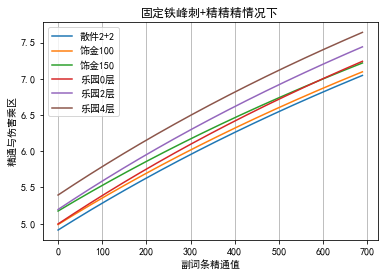

In [114]:
subEm = np.arange(0, 138 * 5) # 副词条提供的精通范围
em1 = eFn1(subEm)
em2= eFn2(subEm)
em3 = eFn3(subEm)
em4 = eFn4(subEm)
plt.plot(subEm, (16 * em1)/(2000 + em1), label = '散件2+2')
plt.plot(subEm, (16 * em2)/(2000 + em2), label = '饰金100')
plt.plot(subEm, (16 * em3)/(2000 + em3), label = '饰金150')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.4, label = '乐园0层')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.6, label = '乐园2层')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.8, label = '乐园4层')
plt.xlabel('副词条精通值')
plt.ylabel('精通与伤害乘区')
plt.title('固定铁峰刺+精精精情况下')
plt.legend()
plt.grid(axis='x')
plt.show()

#### 副词条加成300的情况下,各套装加成差距

In [115]:
em3001 = eFn1(300)
em3002 = eFn2(300)
em3003 = eFn3(300)
em3004 = eFn4(300)
dm3001 = (16 * em3001)/(2000 + em3001)
dm3002 = (16 * em3002)/(2000 + em3002)
dm3003 = (16 * em3003)/(2000 + em3003)
dm30040 = (16 * em3004)/(2000 + em3004) + 0.4
dm30042 = (16 * em3004)/(2000 + em3004) + 0.6
dm30044 = (16 * em3004)/(2000 + em3004) + 0.8
dm300Table = [
    ['', '散件2+2', '饰金100', '饰金150', '乐园0层', '乐园2层', '乐园4层'],
    ['散件2+2', '', dm3002 - dm3001, dm3003 - dm3001, dm30040- dm3001, dm30042 - dm3001, dm30044- dm3001],
    ['饰金100', dm3001 - dm3002, '', dm3003 - dm3002, dm30040- dm3002, dm30042 - dm3002, dm30044- dm3002],
    ['饰金150', dm3001 - dm3003, dm3002 - dm3003, '', dm30040- dm3003, dm30042 - dm3003, dm3003- dm3003],
    ['乐园0层', dm3001 - dm30040, dm3002- dm30040, dm3003- dm30040, '', dm30042- dm30040, dm30044- dm30040],
    ['乐园2层', dm3001 - dm30042, dm3002- dm30042, dm3003- dm30042, dm30040 - dm30042, '', dm30044 - dm30042],
    ['乐园4层', dm3001 - dm30044, dm3002- dm30044, dm3003- dm30044, dm30040- dm30044, dm30042 - dm30044, ''],
]
print(tabulate(dm300Table, tablefmt='github'))

|---------|----------------------|----------------------|----------------------|----------------------|----------------------|---------------------|
|         | 散件2+2              | 饰金100              | 饰金150              | 乐园0层              | 乐园2层              | 乐园4层             |
| 散件2+2 |                      | 0.06265715687668205  | 0.21593241932225027  | 0.14130219581887804  | 0.34130219581887733  | 0.5413021958188775  |
| 饰金100 | -0.06265715687668205 |                      | 0.15327526244556822  | 0.07864503894219599  | 0.2786450389421953   | 0.47864503894219546 |
| 饰金150 | -0.21593241932225027 | -0.15327526244556822 |                      | -0.07463022350337223 | 0.12536977649662706  | 0.0                 |
| 乐园0层 | -0.14130219581887804 | -0.07864503894219599 | 0.07463022350337223  |                      | 0.1999999999999993   | 0.39999999999999947 |
| 乐园2层 | -0.34130219581887733 | -0.2786450389421953  | -0.12536977649662706 | -0.1999999999999993  |                      | 0.2000

## 妮绽放(原绽放)

### 妮露生命值计算
**需求: >74444HP**  

| 加成方式(全满级) | 生命加成 |
|---|---|
| 基础生命值 | 15184 |
| 等级突破加成 | 28.8% |
| 圣遗物主属性-花 | 4780 |
| 圣遗物主属性-杯 | 46.6% |
| 圣遗物主属性-沙 | 46.6% |
| 圣遗物主属性-冠 | 46.6% |
| 圣遗物2件套-千岩 | 20% |
| 圣遗物2件套-花海 | 20% |
| 双水共鸣 | 25% |
| 武器副属性-圣显之钥 | 66.15% |
| 圣遗物副词条-百分比 | a% |
| 圣遗物副词条-数值 | b |

#### 圣遗物副词条生命上下限

| 初始值 | 追加1 | 追加2 | 追加3 | 追加4 | 追加5 |
|---|---|---|---|---|---|
| 4.1% 4.7% 5.3% 5.8% | 8.2%-11.6% | 12.3%-17.4% | 16.4%-23.2% | 20.5%-29% | 24.6%-34.8% |
| 209 239 269 299 | 418-598 | 627-897 | 836-1196 | 1045-1495 | 1254-1794 |

In [116]:
# expect
expectHp = 74444

baseHp = 15184 + 4780

# 0+1 2+2
hp1 = baseHp * (1 + 0.288 + 0.25 + 0.6615 + 0.466 * 3 + 0.2 * 2)
# 0+1 2
hp2 = baseHp * (1 + 0.288 + 0.25 + 0.6615 + 0.466 * 3 + 0.2)
# 0+1
hp3 = baseHp * (1 + 0.288 + 0.25 + 0.6615 + 0.466 * 3)
# 0+0 2+2
hp4 = baseHp * (1 + 0.288 + 0.25 + 0.466 * 3 + 0.2 * 2)
# 0+0
hp5 = baseHp * (1 + 0.288 + 0.25 + 0.466 * 3)
hpTable = [
    ['双水 生生生 套装2+2 专武', hp1, None],
    ['双水 生生生 套装2 专武', hp2, None],
    ['双水-生生生-专武', hp3, (expectHp - hp3)/baseHp],
    ['双水-生生生-套装2+2', hp4, (expectHp - hp4)/baseHp],
    ['双水-生生生', hp5, (expectHp - hp5)/baseHp]
]
print(tabulate(hpTable, headers = ['加成方式', 'HP', '副词条需求'], tablefmt='github'))

| 加成方式                 |      HP |   副词条需求 |
|--------------------------|---------|--------------|
| 双水 生生生 套装2+2 专武 | 79806.1 |              |
| 双水 生生生 套装2 专武   | 75813.3 |              |
| 双水-生生生-专武         | 71820.5 |     0.131412 |
| 双水-生生生-套装2+2      | 66599.9 |     0.392912 |
| 双水-生生生              | 58614.3 |     0.792912 |
